# Skrinning Stuff

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

currentDir = os.getcwd()
sys.path.append(os.path.join(currentDir, '../code/'))
import geomUtils as geom
import IceSheet

In [2]:
geom.charLength('hex', [2.])

1.7320508075688774

In [3]:
diamsCrystal = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.])  # m
gapMelt = 1.e-4  # m

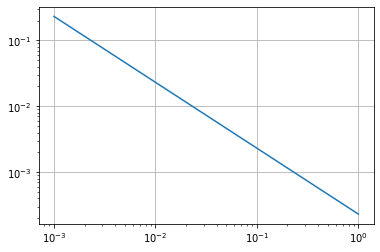

In [4]:
porosities = [(geom.periphery('hex', [x])*gapMelt/2)/(geom.area('hex', [x])) for x in diamsCrystal]
plt.loglog(diamsCrystal, porosities)
plt.grid()

In [5]:
mySheet = IceSheet.IceSheet(iceType='blackIce', thickness=100.0, crystalSize=100.0)

Ice type: blackIce


In [6]:
spatialNodeCount = 51
timeStepCount = 101

In [7]:
A, B, b, U0 = mySheet.setupModel(IC=[-2., 0.], windSpeed=5., aEnv=[0.15, 0.75, 0.1], TEnv=[-2.0, -20.0, -270.], S0=500., Nx=spatialNodeCount, Ny=timeStepCount)
A

I0 = 400.000 W/m2
thermal diffusivity a = 1.14e-06 m2/s
absorption coefficient alpha = 1.200 1/m
spatial stepsize dz = 2.00 mm
temporal stepsize dt = 87.70 s
timescale tScale = 8769.8 s
sigma = 12.5
qRad = -86 W/m2, alphaRad = -86 W/(m2 K), Bi = 6.38e-01
i0 = 9.050
non-dim irradiance source term at top, bottom = 1.086, 0.961


array([[ 26.31900317, -25.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-12.5       ,  26.        , -12.5       , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -12.5       ,  26.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  26.        ,
        -12.5       ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -12.5       ,
         26.        , -12.5       ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -12.5       ,  26.        ]])

In [9]:
Us = []
Us.append(U0)
U = U0

for idx in range(1, timeStepCount):
    U = np.linalg.solve(A, B.dot(U) + b)
    Us.append(U)
    
USoln = np.array(Us)

**TODO** Need to get dx, dy, zStep, tStep, zScale, tScale from mySheet

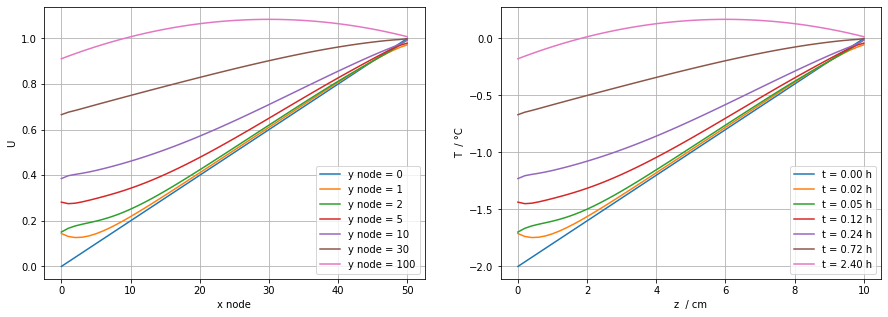

In [10]:
timeIndeces = np.array([0, 1, 2, 5, 10, 30, timeStepCount-1])

THi = 0.
TLo = -2.
TSoln = USoln*(THi - TLo) + TLo
z = np.linspace(0, spatialNodeCount, spatialNodeCount)*mySheet._h0/spatialNodeCount*100  # cm
t = np.linspace(0, timeStepCount, timeStepCount)*8770./timeStepCount/3660  # h

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for timeIndex in timeIndeces:
    i = 0
    axs[i].plot(range(spatialNodeCount), USoln[timeIndex, :], label='y node = '+'{}'.format(timeIndex))
    i = 1
    axs[i].plot(z, TSoln[timeIndex, :], label='t = '+'{:.2f} h'.format(t[timeIndex]))
i = 0
axs[i].set_xlabel('x node')
axs[i].set_ylabel('U')
i = 1
axs[i].set_xlabel('z  / cm')
axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].legend()
    axs[i].grid()

### Simulate a Day or Two

In [24]:
totalTime = 30*3600  # s
timeStep = 15*60  # s
timeStepCount = totalTime//timeStep

In [32]:
tSoln = []
USoln = []
for step in range(timeStepCount):
    time = step*timeStep
    clockHour = (6 + time/3600) % 24
    
    # update irradiation(S0, clockHour)
    # update ice sheet surface temperature?
    # make possible for kwarg IC to accept temperature profile
    # add kwarg silent=True
    A, B, b, U0 = mySheet.setupModel(IC=[-2.0+step/1000, 0.], windSpeed=5., aEnv=[0.15, 0.75, 0.1], TEnv=[-2.0, -20.0, -270.], S0=300., Nx=spatialNodeCount, Ny=timeStepCount)
    # output also: bIrradiance, porosity(z), ...
    U = np.linalg.solve(A, B.dot(U) + b)
    if (clockHour % 1) == 0:
        tSoln.append(clockHour)
        USoln.append(U)
    

I0 = 240.000 W/m2
thermal diffusivity a = 1.14e-06 m2/s
absorption coefficient alpha = 1.200 1/m
spatial stepsize dz = 2.00 mm
temporal stepsize dt = 73.70 s
timescale tScale = 8769.8 s
sigma = 10.504201680672267
qRad = -86 W/m2, alphaRad = -86 W/(m2 K), Bi = 6.38e-01
i0 = 5.430
non-dim irradiance source term at top, bottom = 0.652, 0.577
I0 = 240.000 W/m2
thermal diffusivity a = 1.14e-06 m2/s
absorption coefficient alpha = 1.200 1/m
spatial stepsize dz = 2.00 mm
temporal stepsize dt = 73.70 s
timescale tScale = 8769.8 s
sigma = 10.504201680672267
qRad = -86 W/m2, alphaRad = -86 W/(m2 K), Bi = 6.40e-01
i0 = 5.430
non-dim irradiance source term at top, bottom = 0.652, 0.577
I0 = 240.000 W/m2
thermal diffusivity a = 1.14e-06 m2/s
absorption coefficient alpha = 1.200 1/m
spatial stepsize dz = 2.00 mm
temporal stepsize dt = 73.70 s
timescale tScale = 8769.8 s
sigma = 10.504201680672267
qRad = -86 W/m2, alphaRad = -86 W/(m2 K), Bi = 6.42e-01
i0 = 5.430
non-dim irradiance source term at top,

In [33]:
USoln = np.array(USoln)

In [35]:
USoln.shape

(30, 51)

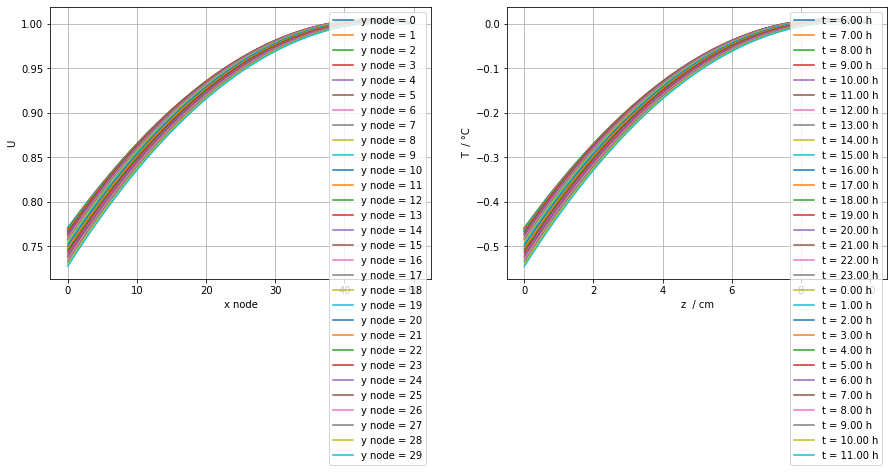

In [37]:
THi = 0.
TLo = -2.
TSoln = USoln*(THi - TLo) + TLo
z = np.linspace(0, spatialNodeCount, spatialNodeCount)*mySheet._h0/spatialNodeCount*100  # cm
t = np.linspace(0, timeStepCount, timeStepCount)*8770./timeStepCount/3660  # h

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for j in range(len(tSoln)):
    i = 0
    axs[i].plot(range(spatialNodeCount), USoln[j, :], label='y node = '+'{}'.format(j))
    i = 1
    axs[i].plot(z, TSoln[j, :], label='t = '+'{:.2f} h'.format(tSoln[j]))
i = 0
axs[i].set_xlabel('x node')
axs[i].set_ylabel('U')
i = 1
axs[i].set_xlabel('z  / cm')
axs[i].set_ylabel('T  / °C')
for i in range(2):
    axs[i].legend()
    axs[i].grid()